In [1]:
import pandas as pd

In [6]:
df = pd.read_excel("../kospi.xlsx", usecols = [0, 1, 2, 3, 4], index_col = "Date")
df.head(1)

,Close,Open,High,Low
Date,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59


In [9]:
# 변동 파생변수
df["change"] = df["High"] - df["Low"]
df.head(1)

,Close,Open,High,Low,change
Date,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59


In [10]:
# 전일변동 파생변수
df["전일변동"] = df["change"].shift()
df.head(1)

,Close,Open,High,Low,change,전일변동
Date,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59,NaN


In [11]:
# 목표가 = 시가 + 전일변동 * 0.5
df["목표가"] = df["Open"] + df["전일변동"] * 0.5
df.head()

,Close,Open,High,Low,change,전일변동,목표가
Date,,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59,NaN,NaN
2000-01-05,986.31,1006.87,1026.52,984.05,42.47,49.59,1031.665
2000-01-06,960.79,1013.95,1014.90,953.50,61.40,42.47,1035.185
2000-01-07,948.65,949.17,970.16,930.84,39.32,61.40,979.870
2000-01-10,987.24,979.67,994.94,965.02,29.92,39.32,999.330


1. 목표가보다 고가가 높으면 목표가로 매수
2. 수익률  -> (종가 - 목표가) / 목표가 + 1
3. 그 외의 수익율은 1

In [13]:
import numpy as np

In [15]:
acc_rtn = 1
for i in df.index :

    if df.loc[i, "High"] > df.loc[i, "목표가"] :
        rtn = (df.loc[i, "Close"] - df.loc[i, "목표가"]) / df.loc[i, "목표가"] + 1
        df.loc[i, "수익률"] = rtn
    else :
        rtn = 1
        df.loc[i, "수익률"] = rtn

    acc_rtn *= rtn
    df.loc[i, "누적수익률"] = acc_rtn

In [16]:
df.tail()

,Close,Open,High,Low,change,전일변동,목표가,수익률,누적수익률
Date,,,,,,,,,
2021-08-23,3090.21,3086.81,3111.81,3064.65,47.16,73.06,3123.340,1.000000,5.237280
2021-08-24,3138.30,3119.70,3142.58,3115.23,27.35,47.16,3143.280,1.000000,5.237280
2021-08-25,3146.81,3148.13,3161.00,3124.25,36.75,27.35,3161.805,1.000000,5.237280
2021-08-26,3128.53,3151.30,3159.37,3121.04,38.33,36.75,3169.675,1.000000,5.237280
2021-08-27,3133.90,3116.29,3143.01,3106.97,36.04,38.33,3135.455,0.999504,5.234682


In [17]:
# np.where(조건식, 참인경우 값, 거짓인경우 값)
df["수익률2"] = np.where(df["High"] >= df["목표가"], (df["Close"] - df["목표가"]) / df["목표가"] + 1, 1)

In [18]:
(df["수익률"] == df["수익률2"]).value_counts()

True    5349
dtype: int64

In [19]:
# 누적수익률
# 누적곱 -> cumprod()
df["누적수익률2"] = df["수익률2"].cumprod()

In [21]:
(df["누적수익률"] == df["누적수익률2"]).value_counts()

True    5349
dtype: int64

In [23]:
## CAGR -> 연복리수익률
## 누적수익률 ** (1 / (투자기간/365)) - 1
# 시계열데이터를 이용하여 기간
delta = df.index[-1] - df.index[0]
delta.days

7906

In [25]:
year = delta.days / 365
CAGR = df["누적수익률"].iloc[-1] ** (1 / year) - 1
print("CAGR : ", CAGR * 100)

CAGR :  7.941722848934241


<Axes: xlabel='Date'>

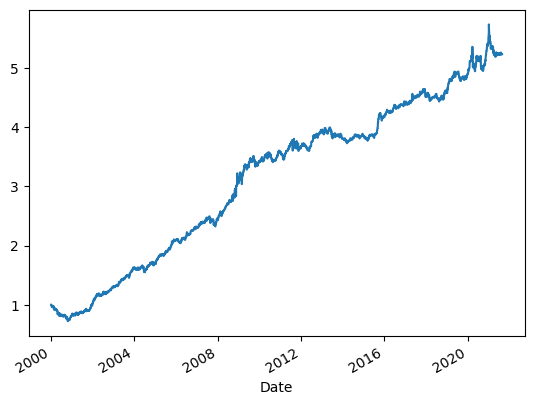

In [26]:
# 변동성동파전략의 누적수익률을 라인그래프 표시
# 바이앤홀드 누적수익률 라인그래프 표시
df["누적수익률"].plot.line()

In [31]:
import matplotlib.pyplot as plt
import platform
if platform.system() == "Darwin" :
    plt.rc("font", family = "AppleGothic")
else :
    plt.rc("font", family = "Malgun Gothic")


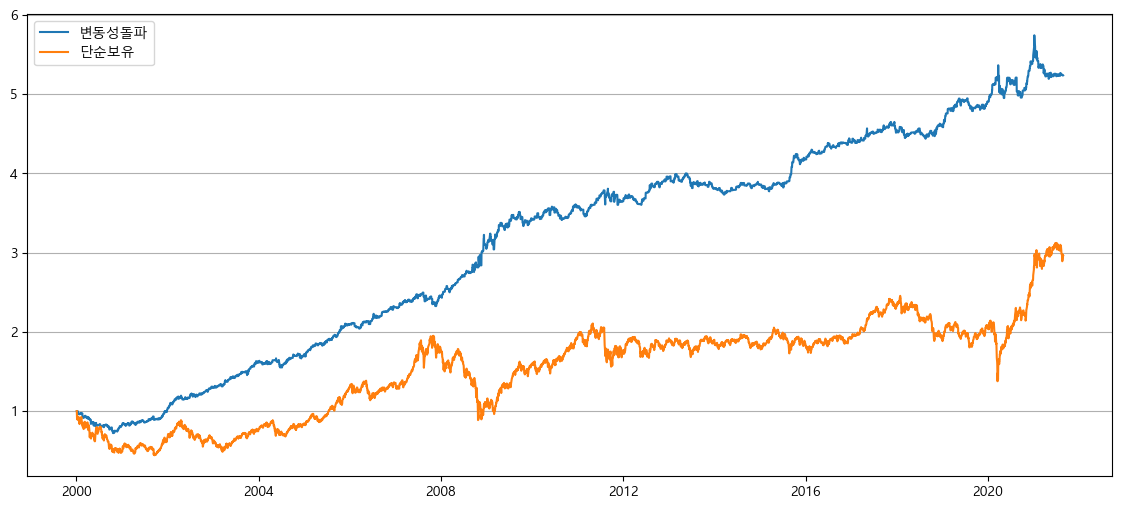

In [32]:
plt.figure(figsize = (14, 6))
plt.grid(True, axis = "y")
plt.plot(df["누적수익률"], label = "변동성돌파")
plt.plot(df["Close"] / df["Close"].iloc[0], label = "단순보유")
plt.legend()
plt.show()

In [33]:
# DD = (1 - 누적수익률 / 전고점) * 100
df["전고점"] = df["누적수익률"].cummax()
df["DD"] = (1 - df["누적수익률"] / df["전고점"]) * 100
df.tail()

,Close,Open,High,Low,change,전일변동,목표가,수익률,누적수익률,수익률2,누적수익률2,전고점,DD
Date,,,,,,,,,,,,,
2021-08-23,3090.21,3086.81,3111.81,3064.65,47.16,73.06,3123.340,1.000000,5.237280,1.000000,5.237280,5.739762,8.754419
2021-08-24,3138.30,3119.70,3142.58,3115.23,27.35,47.16,3143.280,1.000000,5.237280,1.000000,5.237280,5.739762,8.754419
2021-08-25,3146.81,3148.13,3161.00,3124.25,36.75,27.35,3161.805,1.000000,5.237280,1.000000,5.237280,5.739762,8.754419
2021-08-26,3128.53,3151.30,3159.37,3121.04,38.33,36.75,3169.675,1.000000,5.237280,1.000000,5.237280,5.739762,8.754419
2021-08-27,3133.90,3116.29,3143.01,3106.97,36.04,38.33,3135.455,0.999504,5.234682,0.999504,5.234682,5.739762,8.799672


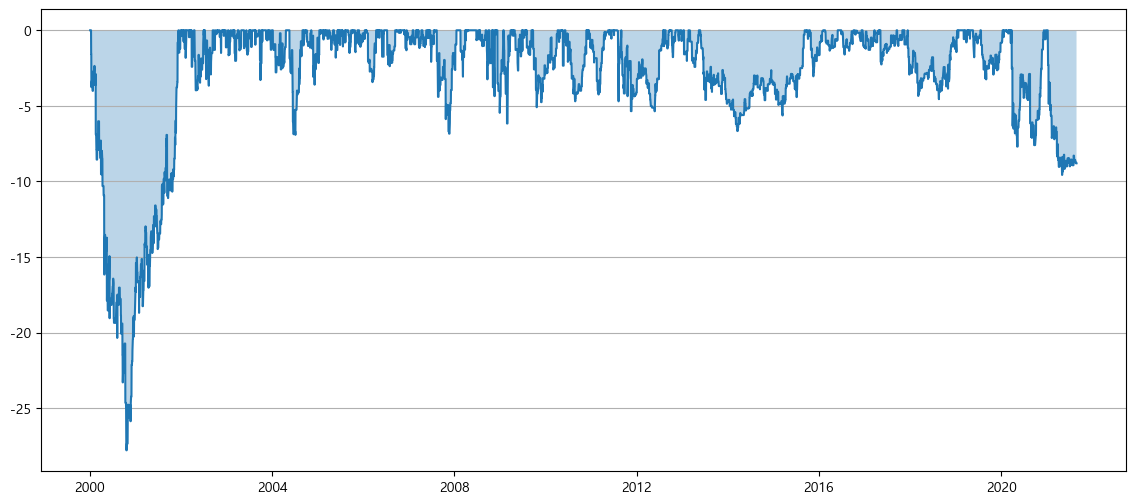

In [37]:
plt.rc("axes", unicode_minus = False)
plt.figure(figsize = (14, 6))
plt.grid(True, axis = "y")
plt.plot(-df["DD"])
plt.fill_between(df.index, -df["DD"], alpha = 0.3)
plt.show()

In [38]:
print("MDD : ", df["DD"].max())

MDD :  27.779726849588627


In [42]:
# 이동평균선 10일치
df["MA10"] = df["Close"].rolling(10).mean()
df.head()

,Close,Open,High,Low,change,전일변동,목표가,수익률,누적수익률,수익률2,누적수익률2,전고점,DD,MA10
Date,,,,,,,,,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59,NaN,NaN,1.0,1.0,1.0,1.0,1.0,0.0,NaN
2000-01-05,986.31,1006.87,1026.52,984.05,42.47,49.59,1031.665,1.0,1.0,1.0,1.0,1.0,0.0,NaN
2000-01-06,960.79,1013.95,1014.90,953.50,61.40,42.47,1035.185,1.0,1.0,1.0,1.0,1.0,0.0,NaN
2000-01-07,948.65,949.17,970.16,930.84,39.32,61.40,979.870,1.0,1.0,1.0,1.0,1.0,0.0,NaN
2000-01-10,987.24,979.67,994.94,965.02,29.92,39.32,999.330,1.0,1.0,1.0,1.0,1.0,0.0,NaN


In [43]:
df["매매신호"] = df["Open"] > df["MA10"].shift(1)

In [ ]:
df

In [46]:
# 수익률 계산 방법 -> 매매신호가 1 이고, 고가가 목표가보다 높은 경우
df["수익률2"] = np.where(
    (df["매매신호"] == 1) & (df["High"] >= df["목표가"]),
    df["Close"]/ df["목표가"],
    1
)

In [48]:
df["누적수익률2"] = df["수익률2"].cumprod()
df

,Close,Open,High,Low,change,전일변동,목표가,수익률,누적수익률,수익률2,누적수익률2,전고점,DD,MA10,매매신호
Date,,,,,,,,,,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59,NaN,NaN,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,NaN,False
2000-01-05,986.31,1006.87,1026.52,984.05,42.47,49.59,1031.665,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,NaN,False
2000-01-06,960.79,1013.95,1014.90,953.50,61.40,42.47,1035.185,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,NaN,False
2000-01-07,948.65,949.17,970.16,930.84,39.32,61.40,979.870,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,NaN,False
2000-01-10,987.24,979.67,994.94,965.02,29.92,39.32,999.330,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-23,3090.21,3086.81,3111.81,3064.65,47.16,73.06,3123.340,1.000000,5.237280,1.0,2.187659,5.739762,8.754419,3165.447,False
2021-08-24,3138.30,3119.70,3142.58,3115.23,27.35,47.16,3143.280,1.000000,5.237280,1.0,2.187659,5.739762,8.754419,3153.235,False
2021-08-25,3146.81,3148.13,3161.00,3124.25,36.75,27.35,3161.805,1.000000,5.237280,1.0,2.187659,5.739762,8.754419,3143.597,False


In [ ]:
plt.figure(figsize = (14, 6))
plt.grid(True, axis = "y")
plt.plot(df["누적수익률"], label = "변동성돌파")
plt.plot(df["Close"] / df["Close"].iloc[0], label = "단순보유")
plt.plot(df["누적수익률2"], label = "변동성돌파(마켓)")
plt.legend()
plt.show()

In [52]:
df["전고점2"] = df["누적수익률2"].cummax()
df["DD2"] = (1 - df["누적수익률2"] / df["전고점2"]) * 100

In [53]:
print("MDD2 : ", df["DD2"].max())

MDD2 :  10.556892232762005


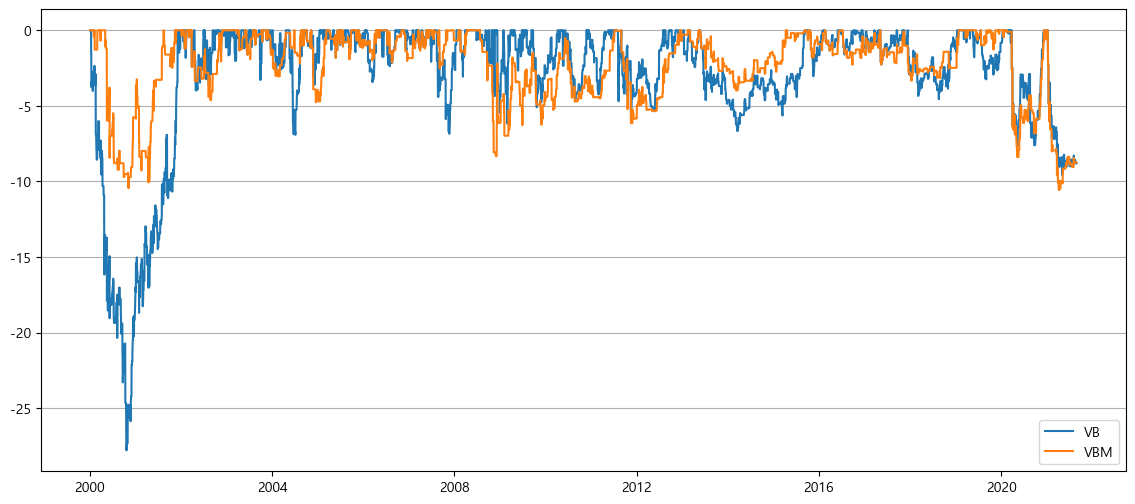

In [54]:
plt.figure(figsize = (14, 6))
plt.grid(True, axis = "y")
plt.plot(-df["DD"], label = "VB")
plt.plot(-df["DD2"], label = "VBM")
plt.legend()
plt.show()